In [ ]:
pip install wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install gensim

# **Import**

In [ ]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_preprocessed.xlsx')
dataset.head()

Unnamed: 0.1  Unnamed: 0                             id_review  \
0             0           0  0Ay4eH9Vr4jS2CE7tK4BE1Vs9co3OD9hT2pg   
1             1           1  0BQ6Xi5iz8Wf4eX2PW6tQ9OS3mm8ZY7lU1Oz   
2             2           2  0Bf3Db0je6ZF7DB0RG6SF4JU2WN8dc3ni3cT   
3             3           5  0Ey1Dm3vB3fS1GA7Cr8Hs3bA8BT7Ut6Ke4xl   
4             4           6  0FL6IO5UE3LW7ZO4lL1IR4qm3gX4nU9iF4cv   

                                  review_clean_cased  \
0  Suka Bali area keluarga yang luar biasa x D me...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2  Lokasi paling pas liat sunrise harus datang se...   
3  Tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                  review_low_uncased  \
0  suka bali area keluarga yang luar biasa x d me...   
1  saya selalu berjalan di pantai sanur pada hari...   
2  lokasi paling pas liat sunrise harus datang se...   
3  tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                              review attractions amenities  \
0  Suka Bali - area keluarga yang luar biasa_x000...        none      none   
1  Saya selalu berjalan di Pantai Sanur pada hari...     positif    netral   
2  Lokasi paling pas liat sunrise..harus datang s...     positif      none   
3  Tempatnya bagus, selalu ramai oleh pengunjung....     positif      none   
4  pantai sanur banyak menyimpan misteri dan sang...     positif      none   

  access    price  ...                                     amenities_text  \
0   none     none  ...                                               none   
1   none     none  ...  Setelah Anda berjalan anda dapat menikmati hid...   
2   none  positif  ...                                               none   
3   none     none  ...                                               none   
4   none     none  ...                                               none   

  access_text                                         price_text  \
0        none                                               none   
1        none                                               none   
2        none  Lokasi paling pas liat sunrise..harus datang s...   
3        none                                               none   
4        none                                               none   

                                      no_aspect_text  \
0  Suka Bali - area keluarga yang luar biasa menc...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2                                               none   
3                                               none   
4                                               none   

                            cleaned_text_attractions  \
0                                               none   
1  lari tonton matahari terbit indah jalan inna g...   
2  lokasi pas liat sunrise jam santai bayar parki...   
3  tempat bagus ramai unjung salah pantai favorit...   
4  pantai sanur simpan misteri unjung lokal asing...   

                              cleaned_text_amenities cleaned_text_access  \
0                                               none                none   
1  jalan nikmat hidang lokal jalan nikmat hidang ...                none   
2                                               none                none   
3                                               none                none   
4                                               none                none   

                                  cleaned_text_price  \
0                                               none   
1                                               none   
2  lokasi pas liat sunrise jam santai bayar parki...   
3                                               none   
4                                               none   

                              cleaned_text_no_aspect  \
0  suka bal area keluarga cinta jalan bal tawar a

# **Aspek Attractions**

### **Text Positif**

In [ ]:
# bukan "none" dan mengambil "positive"
df_attractions = dataset[(dataset['attractions'] != 'none') & ((dataset['attractions'] == 'positif'))]

df_attractions_positive = df_attractions[['cleaned_text_attractions']].values
teks_positif = df_attractions['cleaned_text_attractions']
print(teks_positif)
# df_attractions_positive.head()

1       lari tonton matahari terbit indah jalan inna g...
2       lokasi pas liat sunrise jam santai bayar parki...
3       tempat bagus ramai unjung salah pantai favorit...
4       pantai sanur simpan misteri unjung lokal asing...
5       pantai bersih ramai pantai bersih ramai pantai...
                              ...                        
1709    main libur cocok keluarga lihat sunrise gazebo...
1710        kangen keren dah pokok kangen keren dah pokok
1711    pantai yg cocok lihat sunrise pantai yg cocok ...
1712    pas kesini pas ujan pandang bagus kayak kesini...
1713    sepeda sanur senja oke banget sepeda sanur sen...
Name: cleaned_text_attractions, Length: 1244, dtype: object


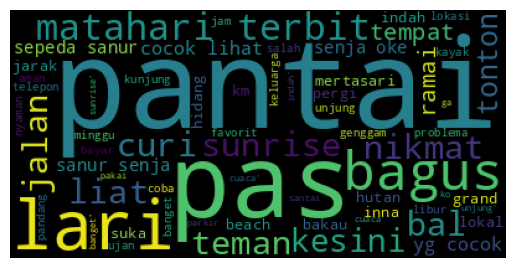

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(df_attractions_positive))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [ ]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_positif = [tokenisasi(t) for t in teks_positif]
print(tokens_positif)

[['lari', 'tonton', 'matahari', 'terbit', 'indah', 'jalan', 'inna', 'grand', 'bal', 'beach', 'pantai', 'mertasari', 'nikmat', 'hutan', 'bakau', 'jarak', 'km', 'jalan', 'nikmat', 'hidang', 'lokal', 'suka', 'pergi', 'pantai', 'matahari', 'terbit', 'problema', 'aman', 'teman', 'teman', 'kunjung', 'curi', 'coba', 'curi', 'telepon', 'genggam', 'lari', 'minggu', 'lari', 'tonton', 'matahari', 'terbit', 'indah', 'jalan', 'inna', 'grand', 'bal', 'beach', 'pantai', 'mertasari', 'nikmat', 'hutan', 'bakau', 'jarak', 'km', 'jalan', 'nikmat', 'hidang', 'lokal', 'suka', 'pergi', 'pantai', 'matahari', 'terbit', 'problema', 'aman', 'teman', 'teman', 'kunjung', 'curi', 'coba', 'curi', 'telepon', 'genggam', 'lari', 'minggu', 'lari', 'tonton', 'matahari', 'terbit', 'indah'], ['lokasi', 'pas', 'liat', 'sunrise', 'jam', 'santai', 'bayar', 'parkir', 'ko', 'ga', 'pakai', 'bayar', 'lokasi', 'pas', 'liat', 'sunrise', 'jam', ''], ['tempat', 'bagus', 'ramai', 'unjung', 'salah', 'pantai', 'favorit', 'bal', 'nyaman

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_positif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_positif]
# View
print(id2word)
print(corpus[:1])

Dictionary<2174 unique tokens: ['aman', 'bakau', 'bal', 'beach', 'coba']...>
[[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 4), (6, 2), (7, 2), (8, 2), (9, 2), (10, 3), (11, 2), (12, 4), (13, 2), (14, 2), (15, 2), (16, 5), (17, 2), (18, 5), (19, 2), (20, 2), (21, 4), (22, 4), (23, 2), (24, 2), (25, 2), (26, 2), (27, 4), (28, 5), (29, 3)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('aman', 2),
  ('bakau', 2),
  ('bal', 2),
  ('beach', 2),
  ('coba', 2),
  ('curi', 4),
  ('genggam', 2),
  ('grand', 2),
  ('hidang', 2),
  ('hutan', 2),
  ('indah', 3),
  ('inna', 2),
  ('jalan', 4),
  ('jarak', 2),
  ('km', 2),
  ('kunjung', 2),
  ('lari', 5),
  ('lokal', 2),
  ('matahari', 5),
  ('mertasari', 2),
  ('minggu', 2),
  ('nikmat', 4),
  ('pantai', 4),
  ('pergi', 2),
  ('problema', 2),
  ('suka', 2),
  ('telepon', 2),
  ('teman', 4),
  ('terbit', 5),
  ('tonton', 3)]]

In [ ]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=3,random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

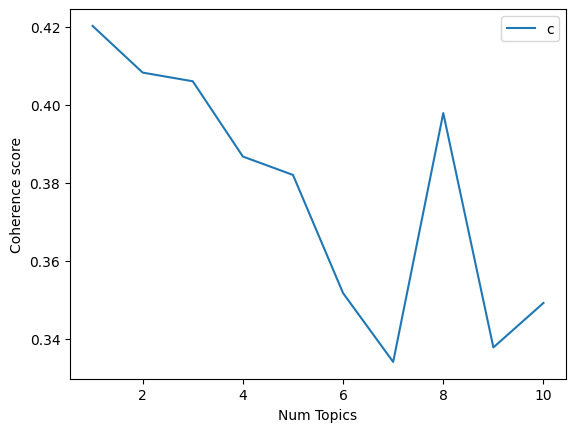

coherence_values:  [0.4202942586249936, 0.40831912994249514, 0.40609310116862113, 0.38678430190308954, 0.38207005970661945, 0.3517503524846801, 0.33409792633187035, 0.39793801767413506, 0.33781302669059454, 0.3492297755396215]


In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_positif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)

plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

In [ ]:
lda_model.print_topics() #num_word default is 10
#lda_model.show_topics() #ini juga bisa

[(0,
  '0.072*"bagus" + 0.055*"pantai" + 0.051*"sunrise" + 0.036*"indah" + 0.028*"yg" + 0.023*"nya" + 0.023*"banget" + 0.020*"pagi" + 0.020*"pandang" + 0.016*"bersih"'),
 (1,
  '0.107*"pantai" + 0.042*"matahari" + 0.039*"terbit" + 0.036*"sanur" + 0.033*"bal" + 0.023*"indah" + 0.020*"nikmat" + 0.017*"salah" + 0.016*"jalan" + 0.016*"pagi"'),
 (2,
  '0.089*"pantai" + 0.039*"bersih" + 0.035*"ombak" + 0.031*"tenang" + 0.025*"anak" + 0.024*"cocok" + 0.023*"indah" + 0.022*"air" + 0.020*"sanur" + 0.019*"renang"')]

In [ ]:
print("Topic distribution for document :", " ".join(tokens_positif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : lari tonton matahari terbit indah jalan inna grand bal beach pantai mertasari nikmat hutan bakau jarak km jalan nikmat hidang lokal suka pergi pantai matahari terbit problema aman teman teman kunjung curi coba curi telepon genggam lari minggu lari tonton matahari terbit indah jalan inna grand bal beach pantai mertasari nikmat hutan bakau jarak km jalan nikmat hidang lokal suka pergi pantai matahari terbit problema aman teman teman kunjung curi coba curi telepon genggam lari minggu lari tonton matahari terbit indah
feature of each token: [('aman', 2), ('bakau', 2), ('bal', 2), ('beach', 2), ('coba', 2), ('curi', 4), ('genggam', 2), ('grand', 2), ('hidang', 2), ('hutan', 2), ('indah', 3), ('inna', 2), ('jalan', 4), ('jarak', 2), ('km', 2), ('kunjung', 2), ('lari', 5), ('lokal', 2), ('matahari', 5), ('mertasari', 2), ('minggu', 2), ('nikmat', 4), ('pantai', 4), ('pergi', 2), ('problema', 2), ('suka', 2), ('telepon', 2), ('teman', 4), ('terbit', 5), ('tont

[(0, 0.099697), (1, 0.84795946), (2, 0.052343532)]

In [ ]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)   # tambahkan indeks [0] pada variabel row

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_positif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Colab Notebooks/doc_topic_dominant_attractions_positive.csv')
# Show
df_dominant_topic.head(5)

<ipython-input-18-dc1c6f4b23cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-18-dc1c6f4b23cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-18-dc1c6f4b23cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-18-dc1c6f4b23cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.8480   
1            1               0              0.5735   
2            2               1              0.3958   
3            3               1              0.6490   
4            4               2              0.9267   

                         Topic Keywords  \
0  pantai, matahari, terbit, sanur, bal   
1     bagus, pantai, sunrise, indah, yg   
2  pantai, matahari, terbit, sanur, bal   
3  pantai, matahari, terbit, sanur, bal   
4   pantai, bersih, ombak, tenang, anak   

                                                Text  
0  [lari, tonton, matahari, terbit, indah, jalan,...  
1  [lokasi, pas, liat, sunrise, jam, santai, baya...  
2  [tempat, bagus, ramai, unjung, salah, pantai, ...  
3  [pantai, sanur, simpan, misteri, unjung, lokal...  
4  [pantai, bersih, ramai, pantai, bersih, ramai,...

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_positif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3946446993115187


In [ ]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)


Coherence Per Topic Score:  [0.27385395418391495, 0.4726659393185467, 0.43741420443209433]


In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

In [ ]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.082149  0.182363       1        1  39.325416
2     -0.137816 -0.153990       2        1  36.503927
0      0.219965 -0.028373       3        1  24.170657, topic_info=         Term        Freq       Total Category  logprob  loglift
42      bagus  696.000000  696.000000  Default  30.0000  30.0000
18   matahari  658.000000  658.000000  Default  29.0000  29.0000
28     terbit  621.000000  621.000000  Default  28.0000  28.0000
41    sunrise  725.000000  725.000000  Default  27.0000  27.0000
93      ombak  516.000000  516.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
419   jogging   66.611256  211.711029   Topic3  -4.9810   0.2637
12      jalan   76.382479  329.323939   Topic3  -4.8441  -0.0413
44   keluarga   66.525487  274.910081   Topic3  -4.9823   0.0012
46     nyaman   62.331885  317.184681   Topic3  -5.0474  -0.2070
73      pasir   63.706229  492.882980   Topic3  -5.0256  -0.6260

[197 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
80        2  0.850764        air
80        3  0.145845        air
882       1  0.045170        aja
882       2  0.045170        aja
882       3  0.948574        aja
...     ...       ...        ...
117       1  0.180625  wisatawan
117       2  0.817566  wisatawan
118       1  0.116922         yg
118       2  0.402139         yg
118       3  0.481858         yg

[250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])